<a href="https://colab.research.google.com/github/MALLIKDEENAR/Daily-Transactions-Finance-Analyst-/blob/main/Daily_Transaction_(Financial_Analyst).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('/content/Daily Household Transactions.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20-09-2018 12:04,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20-09-2018 12:03,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19-09-2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17-09-2018 23:41,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16-09-2018 17:15,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


# Step 2: Data Cleaning
● Handle missing values.
● Correct data types.
● Remove duplicates.

In [4]:
df.shape

(2461, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


In [6]:
# 1. Check missing values
df.isnull().sum()

,0
Date,0
Mode,0
Category,0
Subcategory,635
Note,521
Amount,0
Income/Expense,0
Currency,0


In [7]:
# 2. Fill missing values for Category (if any)
df['Category'].fillna('Unknown', inplace=True)

/tmp/ipython-input-922456785.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Category'].fillna('Unknown', inplace=True)


In [8]:
# 3. Drop rows where Date or Amount is missing
df = df.dropna(subset=['Date', 'Amount'])

In [9]:
# 4. Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

/tmp/ipython-input-3176073073.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [10]:
# Drop any rows where Date could not be parsed
df = df.dropna(subset=['Date'])

In [11]:
# 5. Convert Amount to float
# (Your Amount may still contain strings, so clean it first)
df['Amount'] = df['Amount'].astype(str).str.replace('[^0-9.-]', '', regex=True)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

In [12]:
# Drop rows where Amount conversion failed
df = df.dropna(subset=['Amount'])

In [13]:
# 6. Remove duplicate rows
df.drop_duplicates(inplace=True)

In [14]:
# 7. Verify data types
df.dtypes

,0
Date,datetime64[ns]
Mode,object
Category,object
Subcategory,object
Note,object
Amount,float64
Income/Expense,object
Currency,object


# Step 3: Exploratory Data Analysis (EDA)
● Summary statistics.
● Distribution of transaction amounts.
● Transaction counts by category and type.

In [15]:
# Exploratory Data Analysis (EDA)
# Summary statistics
df.describe()

,Date,Amount
count,1303,1303.000000
mean,2017-05-12 20:41:09.209516544,3076.396892
min,2015-01-13 18:52:00,2.000000
25%,2016-12-18 20:18:00,30.000000
50%,2017-07-27 20:05:00,72.000000
75%,2018-01-30 12:09:00,298.500000
max,2018-09-20 12:04:00,250000.000000
std,NaN,14608.948853


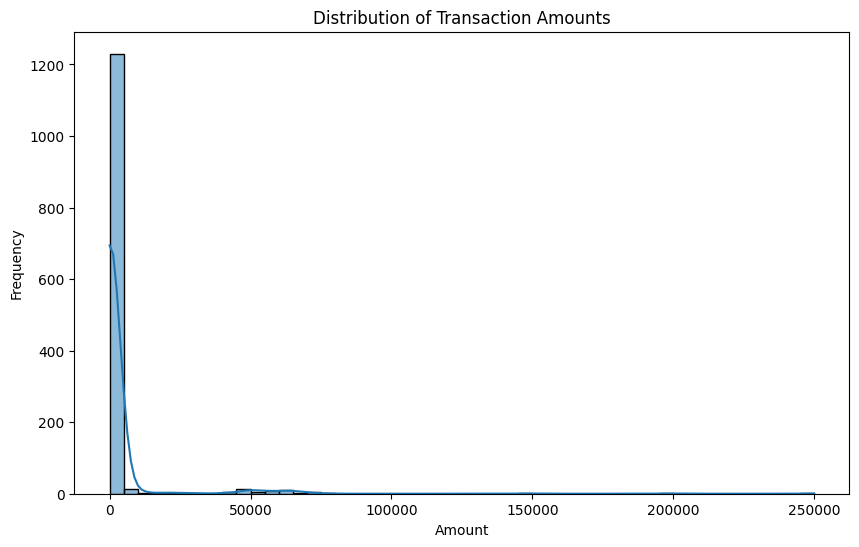

In [16]:
# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Transaction Counts by Category')

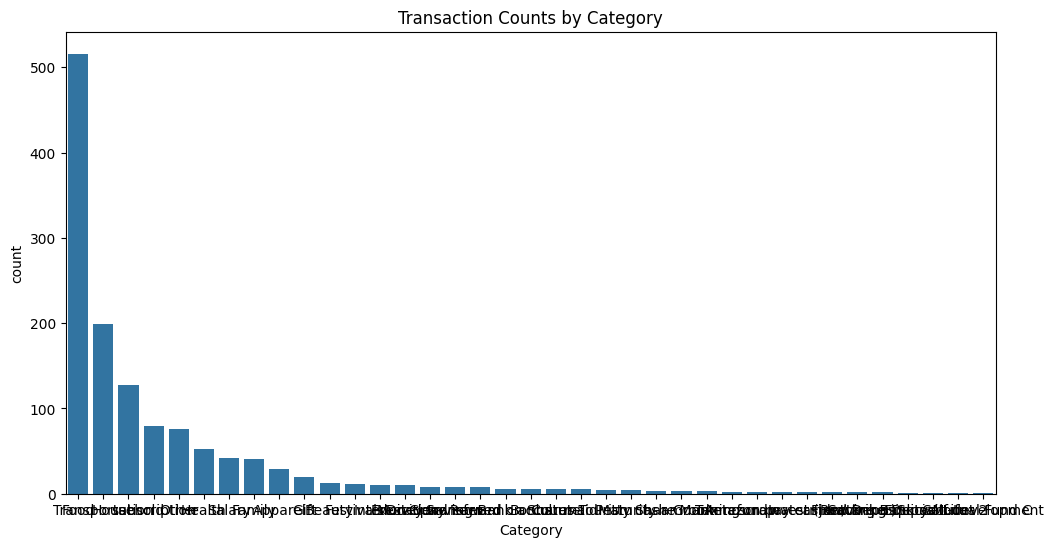

In [17]:
# Transaction counts by category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title('Transaction Counts by Category')

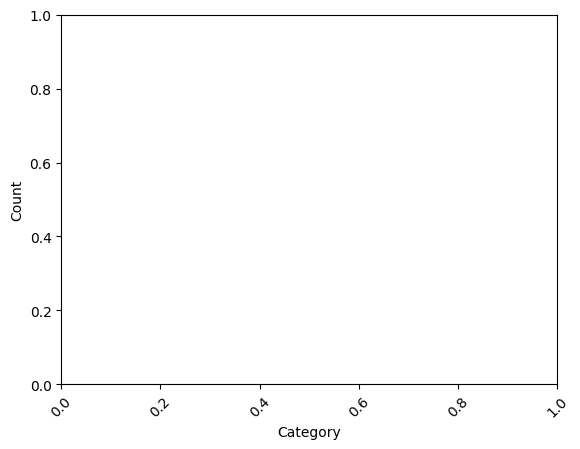

In [18]:
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

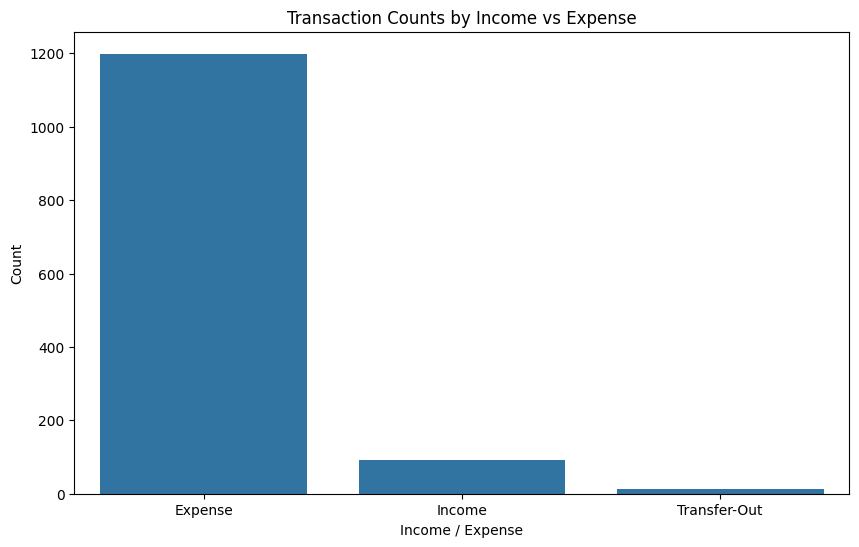

In [19]:
# Transaction Counts by Income/Expense
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Income/Expense', order=df['Income/Expense'].value_counts().index)
plt.title('Transaction Counts by Income vs Expense')
plt.xlabel('Income / Expense')
plt.ylabel('Count')
plt.show()

# Step 4: Time Series Analysis
● Trend analysis.
● Monthly and daily trends.

In [20]:
# Resample data to monthly frequency
monthly_data = df.resample('M', on='Date').sum()

/tmp/ipython-input-2217426780.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M', on='Date').sum()


Text(0, 0.5, 'Total Amount')

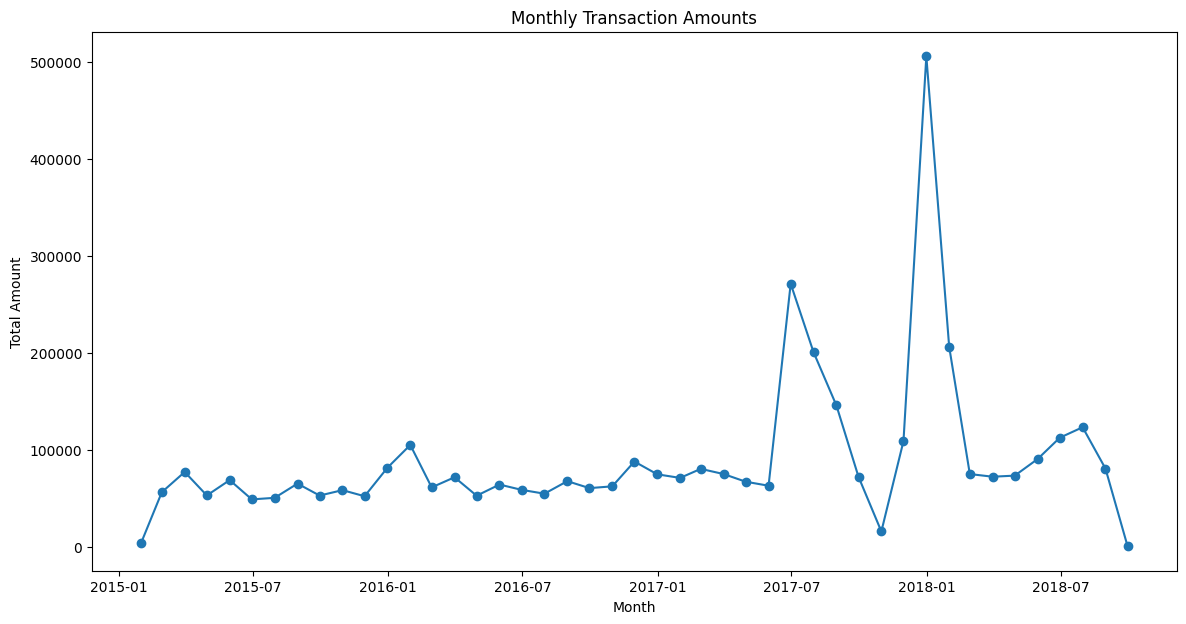

In [21]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data['Amount'], marker='o')
plt.title('Monthly Transaction Amounts')
plt.xlabel('Month')
plt.ylabel('Total Amount')

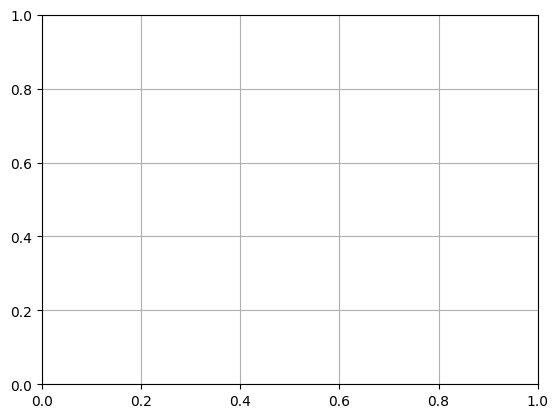

In [22]:
plt.grid(True)
plt.show()

In [23]:
# Daily trends

# Ensure Date is datetime (already done, but safe to include)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [24]:
# Resample to daily frequency and sum amounts
daily_data = df.resample('D', on='Date').sum(numeric_only=True)

In [25]:
# Fill missing days with 0 (optional but recommended for clean line)
daily_data = daily_data.fillna(0)

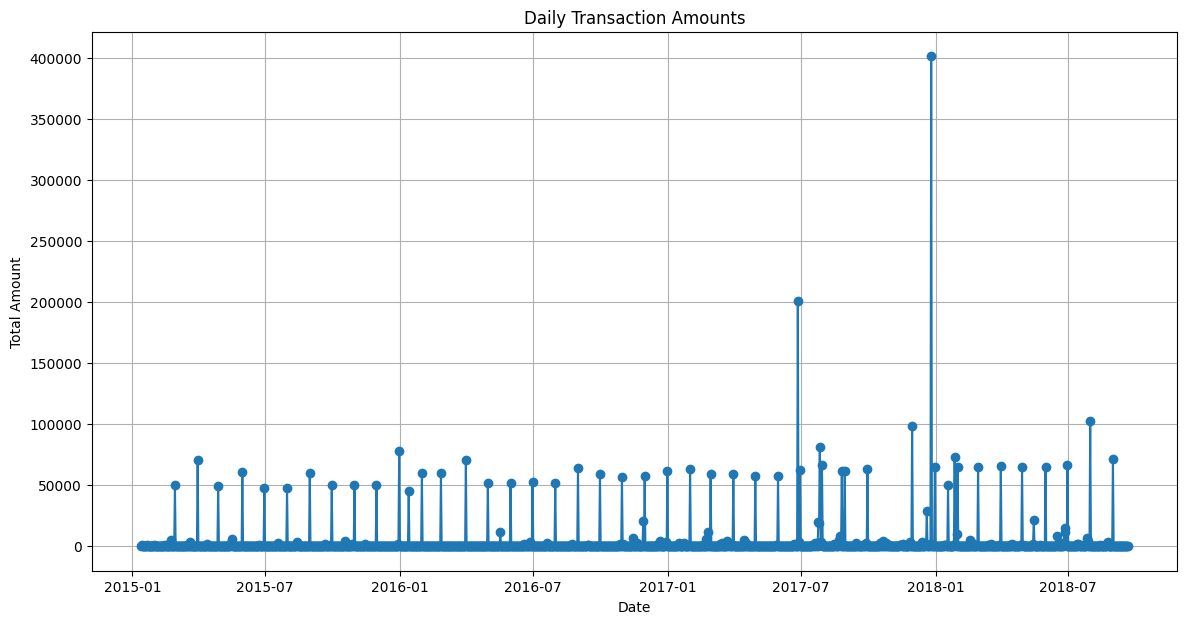

In [26]:
# Plot daily trend
plt.figure(figsize=(14, 7))
plt.plot(daily_data.index, daily_data['Amount'], marker='o')
plt.title('Daily Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

# Step 5: Correlation Analysis
● Analyze the correlation between transaction categories and amounts.

In [27]:
# Create a pivot table for correlation analysis
pivot_table = df.pivot_table(index='Date', columns='Category', values='Amount',
aggfunc='sum', fill_value=0)

In [28]:
# Calculate correlation matrix
correlation_matrix = pivot_table.corr()

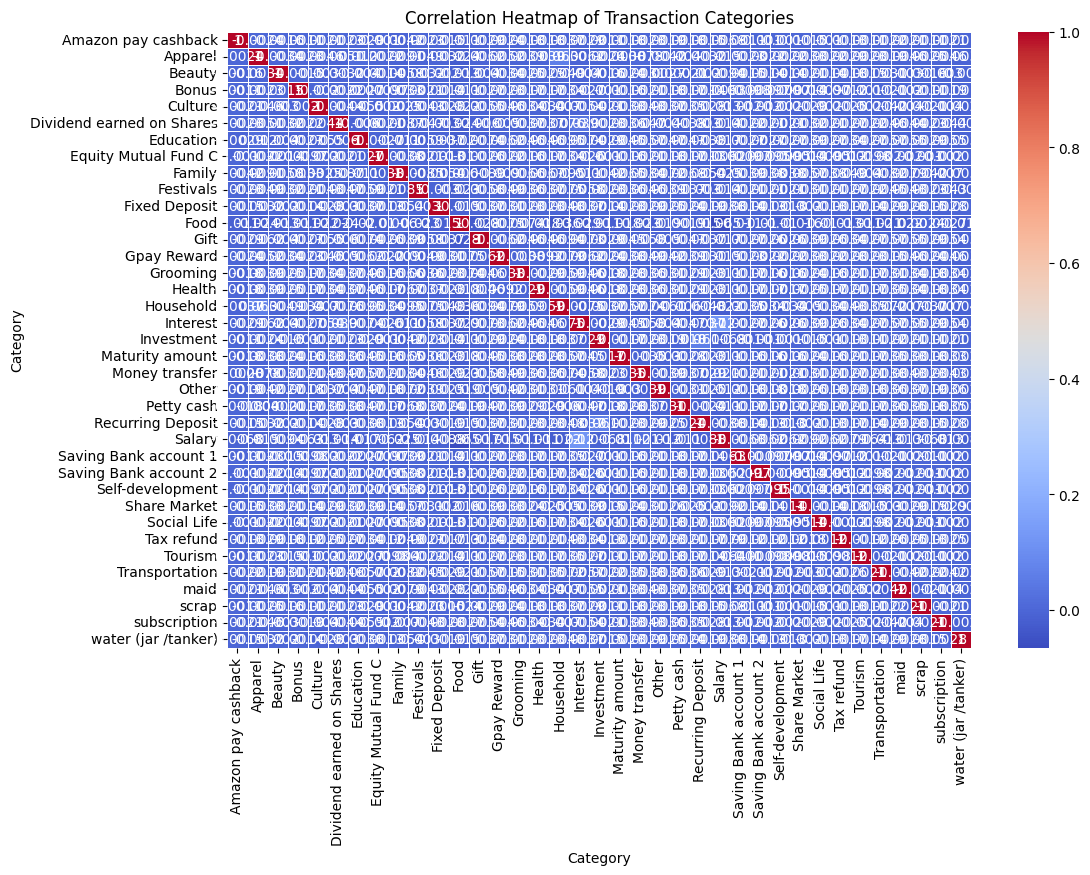

In [29]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Transaction Categories')
plt.show()

# Step 6: Generate Report
● Summarize findings and visualizations.

Summary

The financial transactions dataset was analyzed to identify key trends and insights.
The data cleaning process involved handling missing values, correcting data types, and removing duplicates. Exploratory Data Analysis (EDA) revealed the distribution of transaction amounts, transaction counts by category and type, and significant patterns over time. Time series analysis highlighted monthly and daily transaction trends. Correlation analysis identified relationships between different transaction categories.

Key Findings

● The distribution of transaction amounts showed a right-skewed pattern with most transactions clustered around lower values.

● Sales and Purchases were the most common transaction categories.

● Credit transactions were more frequent than Debit transactions.

● Monthly transaction trends revealed seasonal patterns with peaks in certain
months.

● Correlation analysis indicated strong relationships between certain transaction categories.

Visualizations

● Distribution of Transaction Amounts

● Transaction Counts by Category and Type

● Monthly and Daily Transaction Amounts

● Correlation Heatmap of Transaction Categories

This project provides valuable insights into daily financial transactions, helping to inform decision-making and strategic planning.